<a href="https://colab.research.google.com/github/adithya7shankar/Undergrad-hobby-projects/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.4MB/s 
     |████████████████████████████████| 9.5MB 30.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/ICICIBANK.NS.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()


Shape of data (1227, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-06,265.854553,268.672729,261.827271,265.154541,240.552719,19736579.0
2014-04-06,265.436371,270.281830,262.545441,267.163635,246.259247,12880208.0
2014-05-06,263.090912,267.454559,261.336365,266.027283,249.111038,21069081.0
2014-06-06,267.745453,273.336365,265.454559,270.236359,253.052460,21390919.0
2014-09-06,270.209076,274.854553,269.727264,271.309082,254.056946,21202940.0


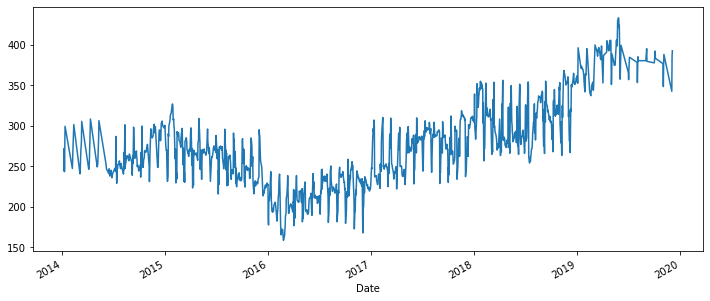

In [ ]:
df['Adj Close'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Adj Close'])

1. ADF :  -0.6525635375823973
2. P-Value :  0.8586571461317817
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1226
5. Critical Values :
	 1% :  -3.4356950607889254
	 5% :  -2.863900342696613
	 10% :  -2.568026681232353


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
stepwise_fit = auto_arima(df['Adj Close'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1227
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3766.497
Date:                Thu, 17 Jun 2021   AIC                           7534.994
Time:                        05:39:04   BIC                           7540.105
Sample:                             0   HQIC                          7536.917
                               - 1227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        27.2904      0.604     45.149      0.000      26.106      28.475
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              1192.77
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1227, 6)
(1197, 6) (30, 6)
Open         3.942000e+02
High         3.969500e+02
Low          3.918000e+02
Close        3.927500e+02
Adj Close    3.908407e+02
Volume       9.770752e+06
Name: 2019-04-15 00:00:00, dtype: float64 Open         4.208500e+02
High         4.280000e+02
Low          4.196000e+02
Close        4.262000e+02
Adj Close    4.241281e+02
Volume       1.828104e+07
Name: 2019-05-30 00:00:00, dtype: float64


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Adj Close'],order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 1196
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3649.470
Method:                           css   S.D. of innovations              5.116
Date:                Thu, 17 Jun 2021   AIC                           7302.940
Time:                        05:39:28   BIC                           7313.114
Sample:                             1   HQIC                          7306.773
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1272      0.148      0.860      0.390      -0.163       0.417
==============================================================================
"""

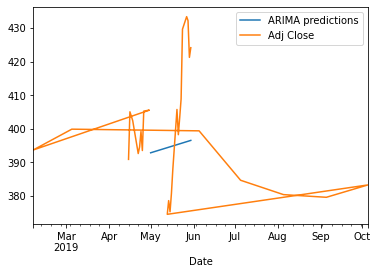

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2019-05-01',end='2019-05-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['Adj Close'].plot(legend=True)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Adj Close']))
print(rmse)


16.470247675047183


In [ ]:
model2=ARIMA(df['Adj Close'],order=(0,1,0))
model2=model2.fit()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-24,415.500000,433.549988,412.649994,431.750000,429.651062,37708344.0
2019-05-27,432.250000,438.799988,429.649994,435.500000,433.382843,23397222.0
2019-05-28,435.049988,439.200012,428.100006,434.299988,432.188660,23389724.0
2019-05-29,428.600006,430.450012,422.100006,423.299988,421.242126,22132254.0
2019-05-30,420.850006,428.000000,419.600006,426.200012,424.128052,18281037.0


In [ ]:
index_future_dates=pd.date_range(start='2020-05-01',end='2020-05-31')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-01    424.277787
2020-05-02    424.427522
2020-05-03    424.577258
2020-05-04    424.726993
2020-05-05    424.876728
2020-05-06    425.026463
2020-05-07    425.176198
2020-05-08    425.325933
2020-05-09    425.475669
2020-05-10    425.625404
2020-05-11    425.775139
2020-05-12    425.924874
2020-05-13    426.074609
2020-05-14    426.224345
2020-05-15    426.374080
2020-05-16    426.523815
2020-05-17    426.673550
2020-05-18    426.823285
2020-05-19    426.973020
2020-05-20    427.122756
2020-05-21    427.272491
2020-05-22    427.422226
2020-05-23    427.571961
2020-05-24    427.721696
2020-05-25    427.871432
2020-05-26    428.021167
2020-05-27    428.170902
2020-05-28    428.320637
2020-05-29    428.470372
2020-05-30    428.620107
2020-05-31    428.769843
Freq: D, Name: ARIMA Predictions, dtype: float64


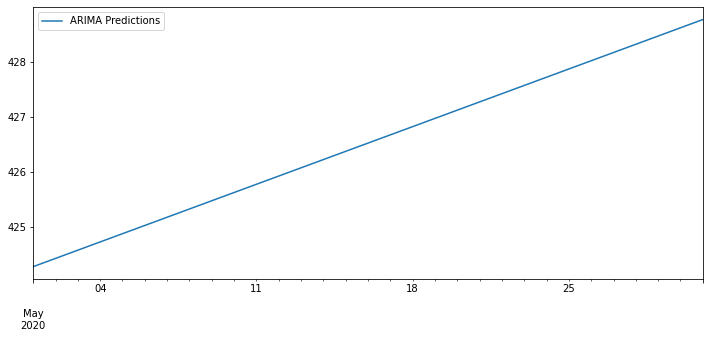

In [ ]:
pred.plot(figsize=(12,5),legend=True)